In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
days = ["day "+str(i+1) for i in range(10)]
names=["Q-EMS","DQN","Fixed"]
colors = ['#1d3f9a','#bc781a','#347a2a']

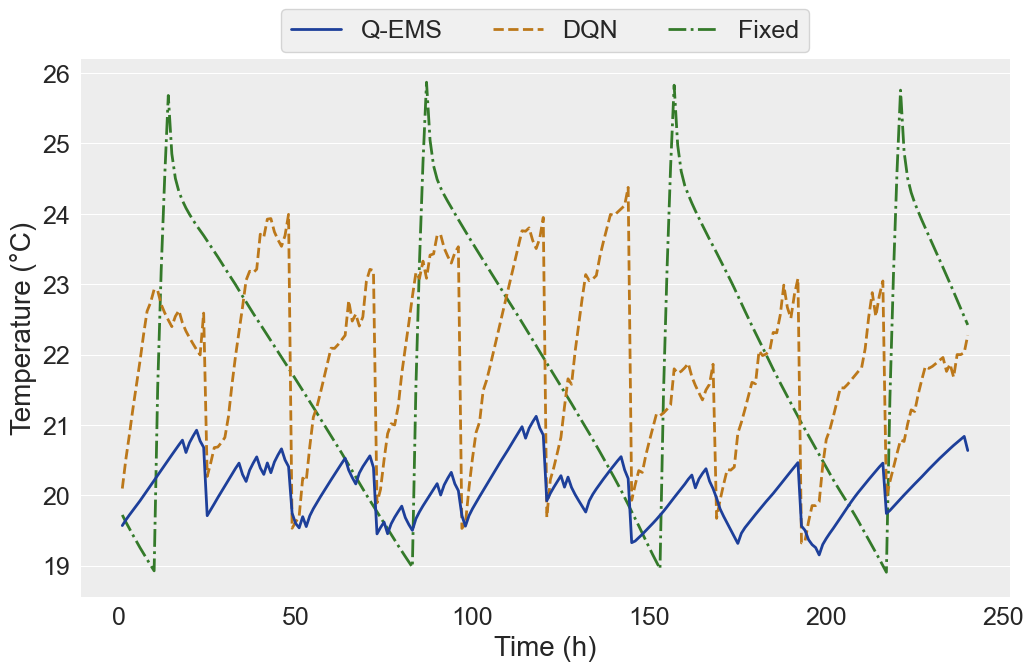

In [9]:
def day_profit():
    x = range(1, 241, 1)
    qems = np.load("QEMS_avg_soc.npy")
    baseline1 = np.load("baseline1_avg_soc.npy")
    baseline2 = np.load("baseline2_avg_soc.npy")
    meth = [qems, baseline1, baseline2]
    
    plt.figure(figsize=(12, 7))
    ax1 = plt.gca()
    ax1.xaxis.grid(False)
    sns.set_style("darkgrid", {"axes.facecolor": ".93"})
    
    handles = []  # 存储线条对象
    for i, method in enumerate(meth[:]):
        for j in range(240):
            method[j] = method[j] * 6 + 19
        if i == 0:
            line, = plt.plot(x, method, linewidth=2.0, color=colors[i], markevery=20, linestyle='-', zorder=3, label=names[i])
        elif i == 1:
            line, = plt.plot(x, method, linewidth=2.0, color=colors[i], markevery=20, linestyle='--', zorder=2, label=names[i])
        else:
            line, = plt.plot(x, method, linewidth=2.0, color=colors[i], markevery=20, linestyle='-.', zorder=1, label=names[i])
        handles.append(line)

    plt.rcParams.update({'font.size': 18})
    plt.legend(handles, names, loc='center', bbox_to_anchor=(0.5, 1.05), ncol=6, fontsize=18)
    plt.ylabel("Temperature (°C)", fontdict={'size': 20})
    plt.xlabel("Time (h)", fontdict={'size': 20})
    plt.savefig("avg_soc.pdf", dpi=1500, bbox_inches='tight', format="pdf")
    plt.show()

day_profit()
